##  Student Performance Indicator


### Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose the best model

#### 1) Problem statement

* This project understands how the student's performance(test score) is affected by other varibales such as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course.

#### 2) Data Collection

* Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 columns and 1000 rows.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [3]:
print("hello") 

hello


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

Import the CSV Data as Pandas DataFrame

In [5]:
# df = pd.read_csv('notebook\data\stud.csv')
df = pd.read_csv('data/stud.csv')  

Show Top 5 Records

In [6]:
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [7]:
df.shape

(1000, 8)

##### Dataset information


* gender: sex of students -> (Male/female)
* race/ethnicity: ethnicity of students -> (Group A , B , C , D , E)
* parental level of education: parent's final education -> (bachelor's degree, some college, master's degree,assosciate's degree , high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

### 3) Data Checks to perform 

* check missing values
* check duplicates
* check data type
* check the number of unique values of each column
* check statistics of the dataset
* check various categories present in the different categorical columns

3.1 Check Missing Values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

3.2 Check duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

3.3 Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Only three columns (math score , reading score and writing score) are of integer data types. Remaining five columns are object (catregorical) data types. 

3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5  Check Statistics of the dataset

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights

   * From above description of numerical data, all means are very close to each other - between 66.08 to 69.16
   * All Standard Deviations are also close - between 14.6 to 15.19
   * while there is a minimum score of 0 for math , minimum score for reading is much higher = 17 and that of writing = 10.
   

3.7 Exploring Data

In [13]:
# Gender
print('categories present in "gender" variable:     ', end = "")
print(df['gender'].unique())

# Race/Ethnicity
print('categories present in "race/ethnicity" variable:   ', end = "")
print(df['race/ethnicity'].unique())

# Parental level of education
print('categories present in "parental level of education" variable:     ', end = "")
print(df['parental level of education'].unique())

# Lunch
print('categories present in "lunch" variable:   ', end = "")
print(df['lunch'].unique())

# test preparation course
print('categories present in "test preparation course" variable:  ', end = "")
print(df['test preparation course'].unique())  

categories present in "gender" variable:     ['female' 'male']
categories present in "race/ethnicity" variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories present in "parental level of education" variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories present in "lunch" variable:   ['standard' 'free/reduced']
categories present in "test preparation course" variable:  ['none' 'completed']


In [14]:
# Defining numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']


# print columns
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical features : {}'.format(len(categorical_features), categorical_features)) 


we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for "Total Score" and "Average" 

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [16]:
reading_full = df[df['reading score']==100].shape[0]
writing_full = df[df['writing score']==100].shape[0]
math_full = df[df['math score']==100].shape[0] 


print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}') 

Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [17]:
reading_less_20 = df[df['reading score'] <= 20].shape[0] 
writing_less_20 = df[df['writing score'] <= 20].shape[0]
math_less_20 = df[df['math score'] <= 20].shape[0] 

print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')   



Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


### Insights

  * From above values we get students have performed the worst in Maths
  * Best performance in reading section 

### 4) Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

* Histogram
* Kernel Distribution Function

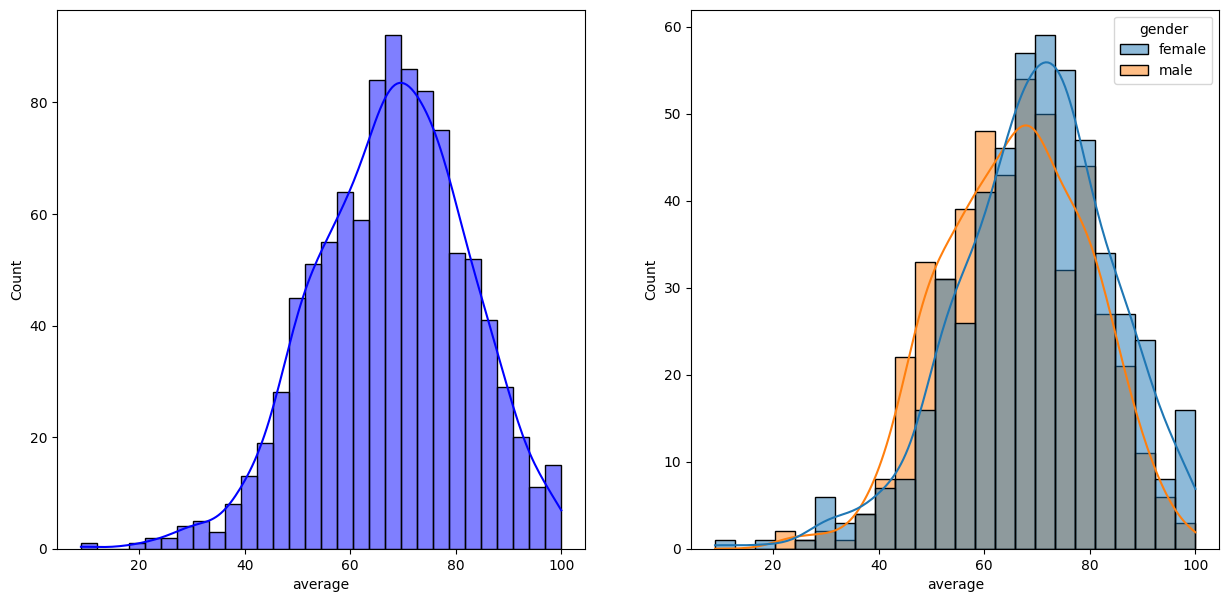

In [18]:
fig , ax = plt.subplots(1,2,figsize=(15,7))   # With respect to average 
plt.subplot(121)
sns.histplot(data = df , x = 'average' , bins = 30 , color = 'blue', kde = True)
plt.subplot(122)
sns.histplot(data = df , x = 'average' , kde = True , hue = 'gender')
plt.show() 

#### Insights

 * Female students tend to perform well than male students

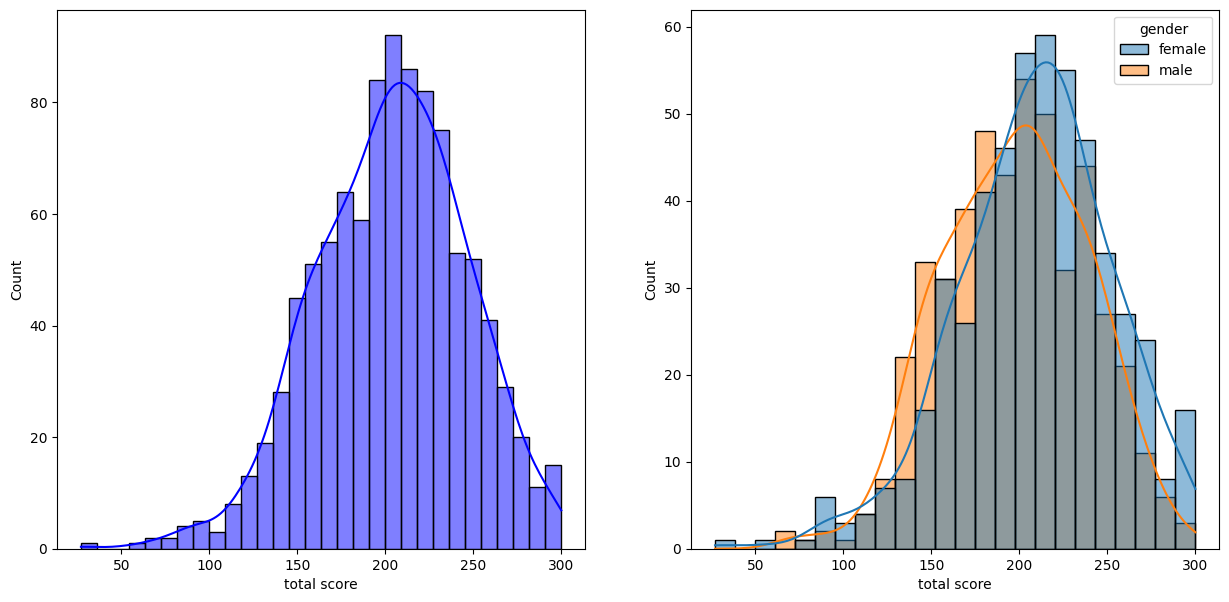

In [19]:
fig , ax = plt.subplots(1,2,figsize=(15,7)) # with respect to the total marks 
plt.subplot(121)
sns.histplot(data = df , x = 'total score' , bins = 30 , color = 'blue', kde = True)
plt.subplot(122)
sns.histplot(data = df , x = 'total score' , kde = True , hue = 'gender') 
plt.show()

Also with respect to the total score , female students are performing well than male students.

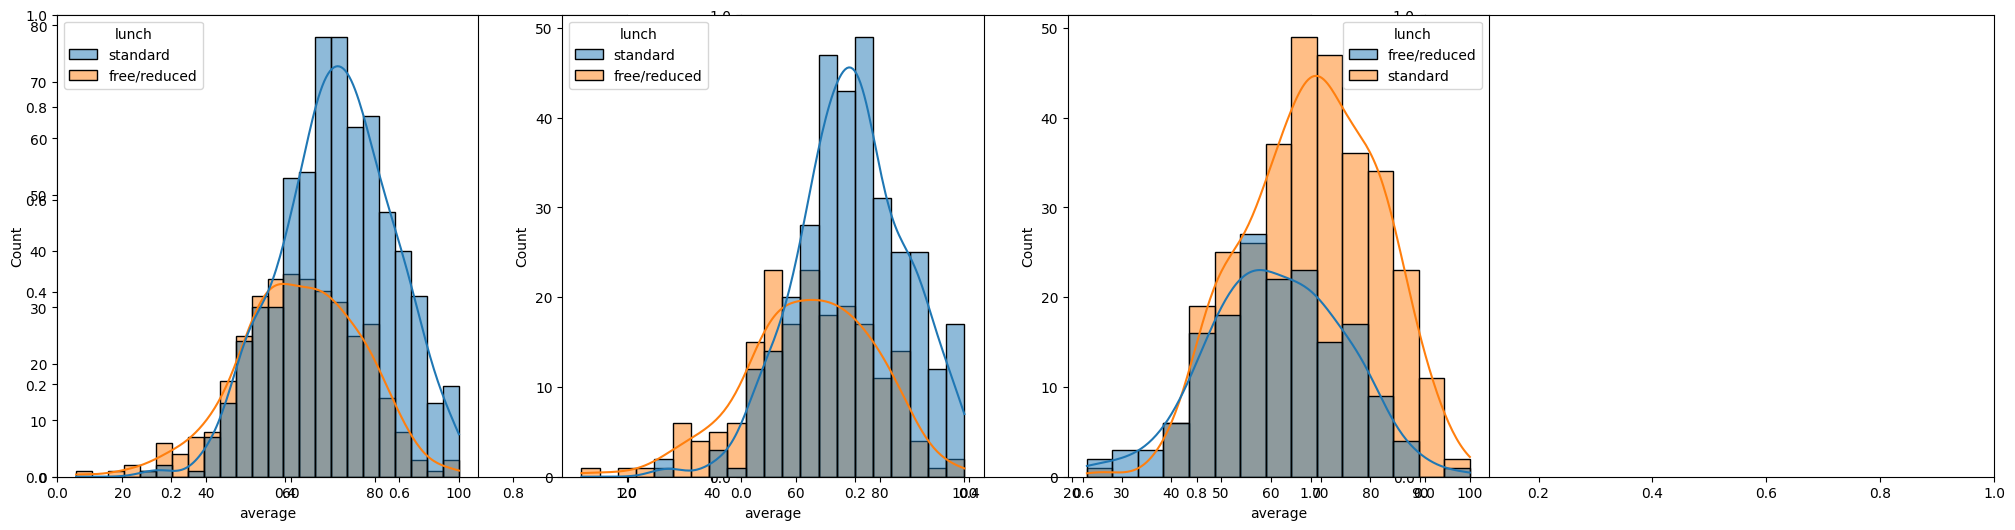

In [20]:
plt.subplots(1,3, figsize = (25,6)) # with respect to lunch 
plt.subplot(141)
sns.histplot(data = df , x = 'average', kde = True ,hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'] , x = 'average', hue = 'lunch' , kde = True)
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'] , x = 'average', kde = True , hue = 'lunch')
plt.show()

### Insights

* Be it a male or female , standard lunch helps students to perform well in exams . 

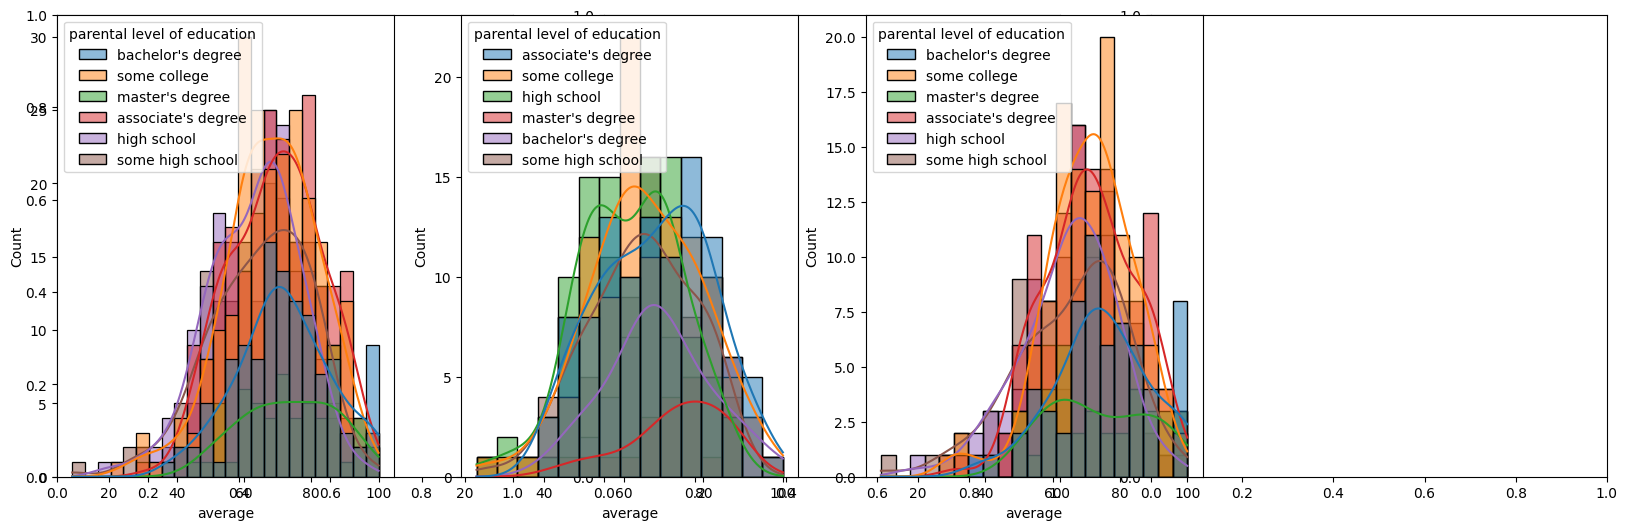

In [21]:
plt.subplots(1,3, figsize = (20,6)) # with respect to the parental level of education 
plt.subplot(141)
sns.histplot(data = df , x = 'average' , hue = 'parental level of education', kde = True )
plt.subplot(142)
sns.histplot(data = df[df.gender=='male'] , x = 'average' , hue = 'parental level of education', kde = True)
plt.subplot(143)
sns.histplot(data = df[df.gender=='female'] , x = 'average' , hue = 'parental level of education', kde = True)
plt.show()

Insights 

* Parental level of education has no impact on students performance

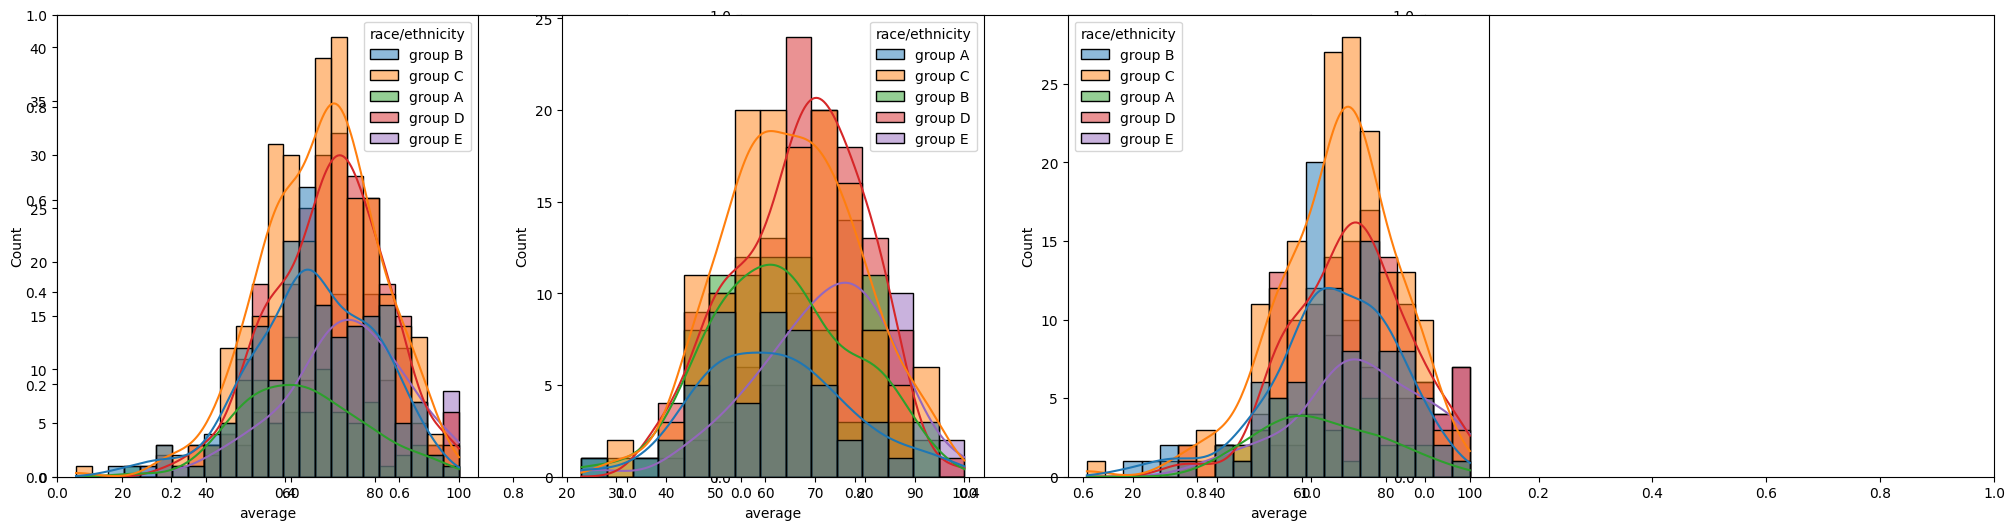

In [22]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df , x = 'average' , hue = 'race/ethnicity', kde = True)
plt.subplot(142)
sns.histplot(data = df[df.gender=='male'], x = 'average', hue = 'race/ethnicity', kde = True)
plt.subplot(143)
sns.histplot(data = df[df.gender=='female'],x = 'average', hue = 'race/ethnicity', kde = True)
plt.show()

### Insights 

* Students of group A and group B perform poorly in the exams. 


##### 4.2 Maximum score of Students in All Three Subjects.

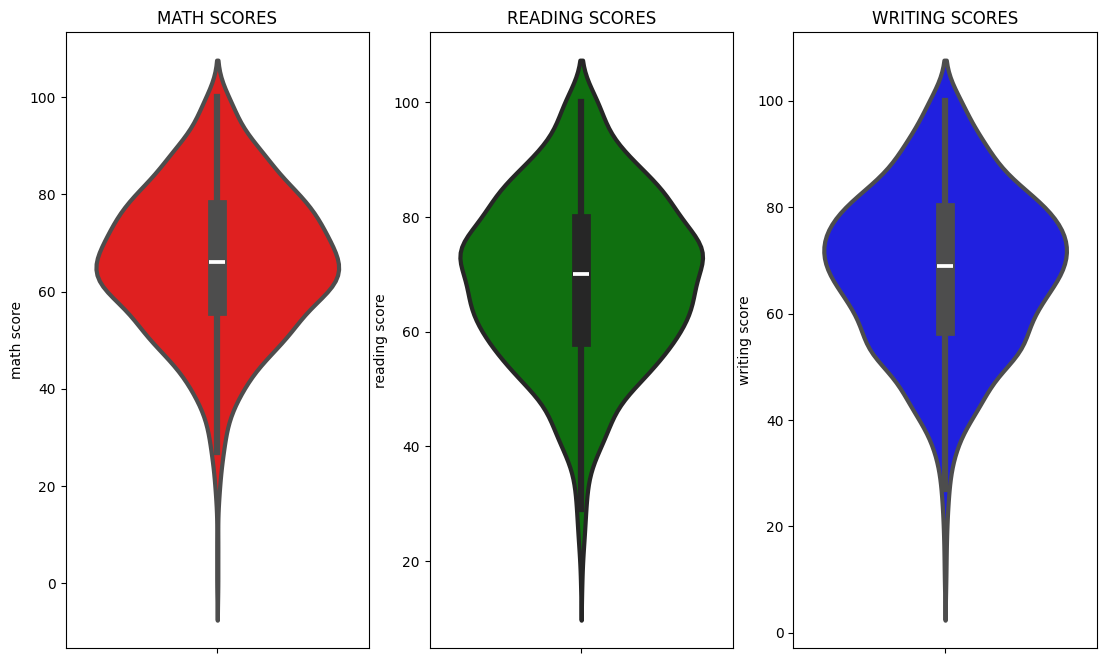

In [23]:
plt.figure(figsize = (18 , 8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(data = df , y = 'math score' , color = 'red' , linewidth = 3) 
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(data = df , y = 'reading score' , color = 'green' , linewidth = 3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(data = df , y = 'writing score' , color = 'blue' , linewidth = 3) 
plt.show()

* Insights 

 From the above plots , we see that most of the students score between 60 - 80 in maths whereas in reading and writing most of the students score in between 50 - 80. 

### Feature wise visualisation. 


#####  Gender Column 
  * How is ditribution of gender ?
  * Is gender has any impact on student's on performance ?

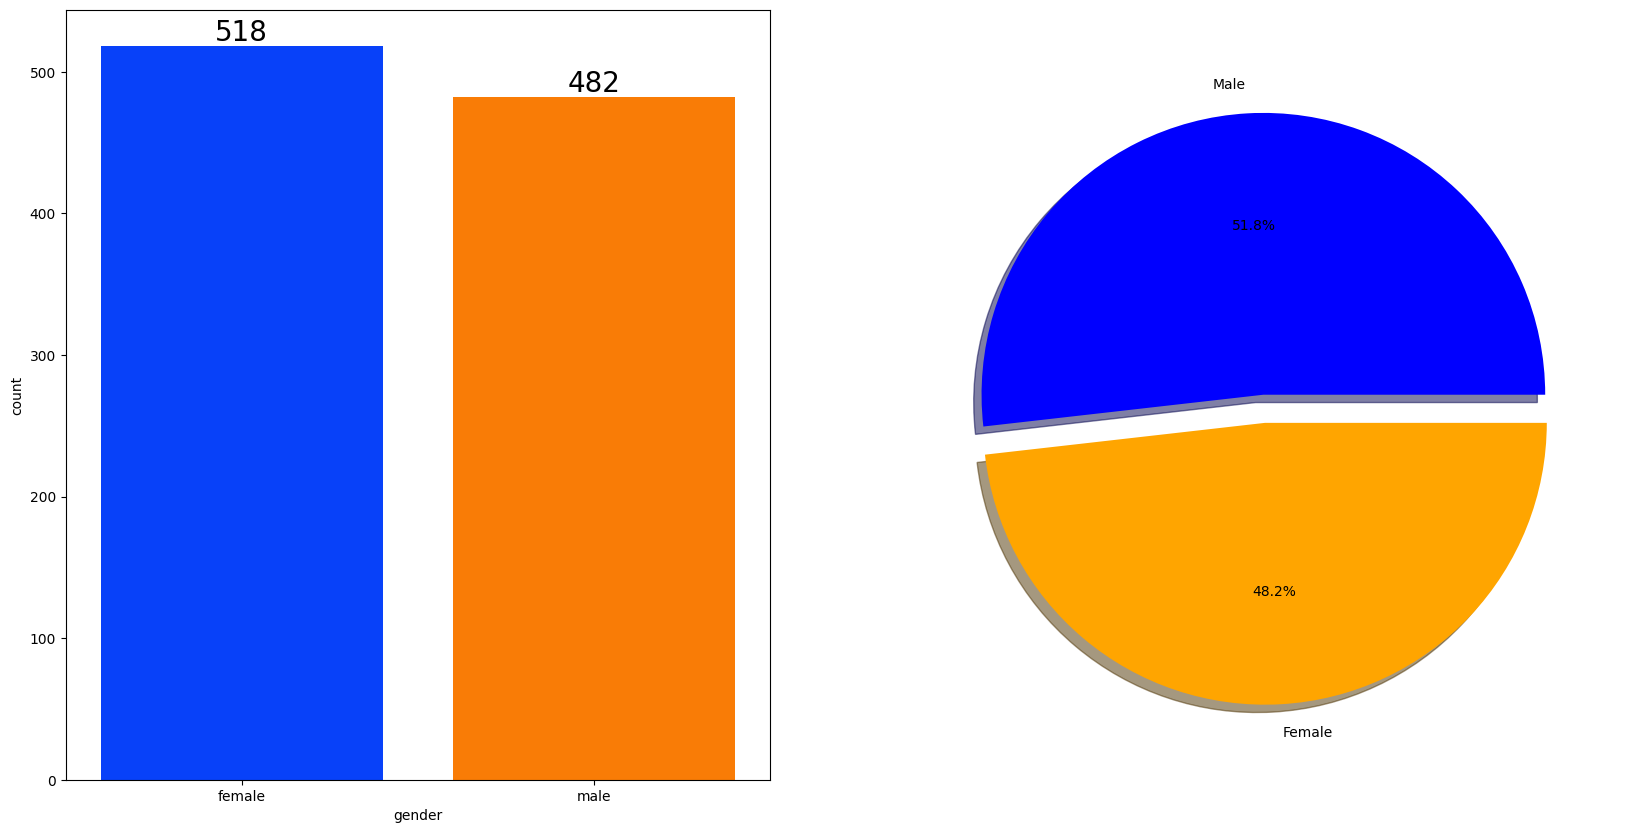

In [39]:
f , ax = plt.subplots(1,2,figsize = (20 , 10))   # plotting two subplots 
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)  # first subplot specifying the distribution of gender using count plot . 
for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 20)    # labelling each bar in the first subplot

# Plotting a pie chart for the distribution of gender variable.   
plt.pie(x = df['gender'].value_counts() , labels = ['Male' , 'Female'] , colors = ['blue', 'orange'] , shadow = True , explode = [0,0.1],autopct = '%1.1f%%')     
plt.show() 

Insights 

* Gender has a balanced data with 518 male students(51.8%) and 482 female students(48.2%) 

##### Race/Ethnicity Column

* How is Group wise distribution ?
* Is Race/Ethnicity has any impact on student's performance?

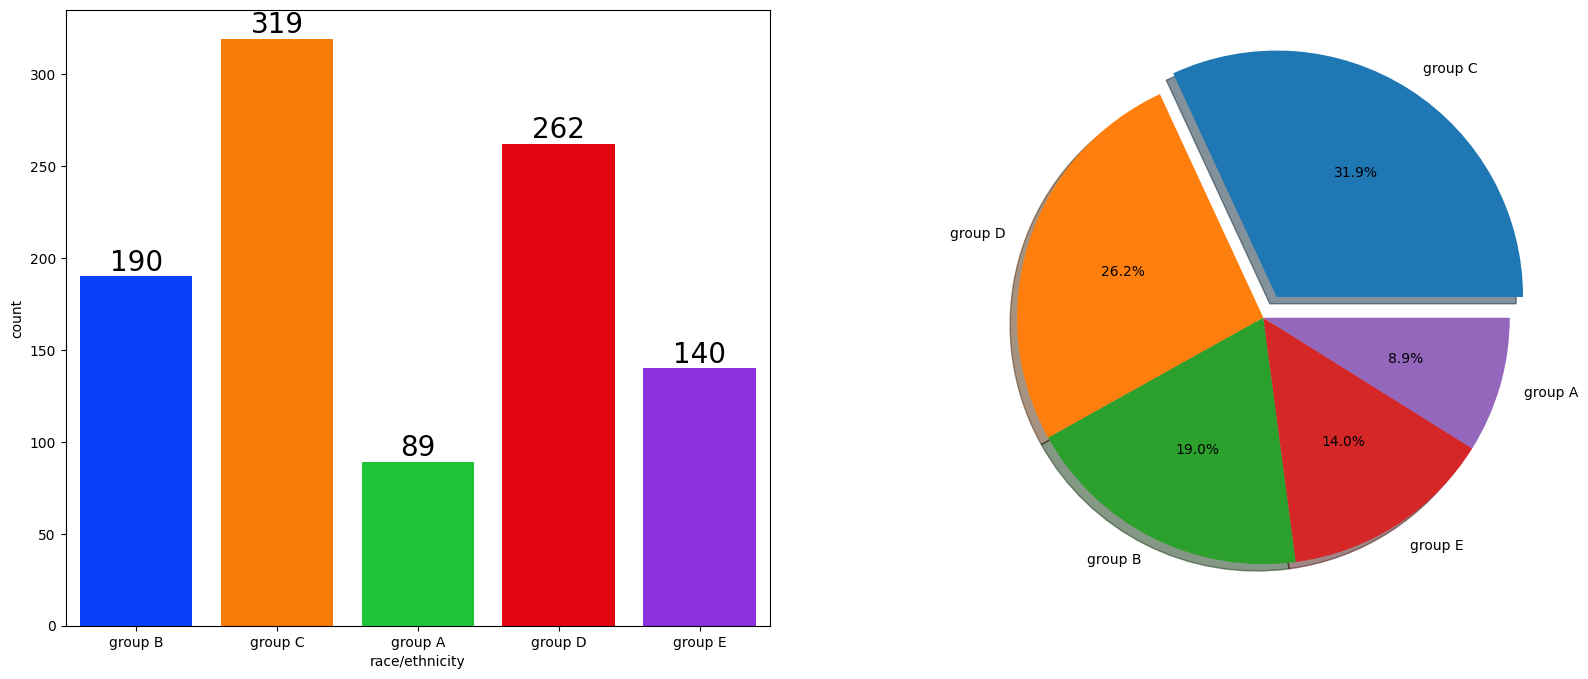

In [49]:
f , ax = plt.subplots(1,2,figsize = (20,8))
sns.countplot(x = df['race/ethnicity'] , data = df , ax = ax[0] , palette = 'bright' , saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 20)

plt.pie(x = df['race/ethnicity'].value_counts(), labels = df['race/ethnicity'].value_counts().index, explode = [0.1,0,0,0,0], shadow = True , autopct = '%1.1f%%')   

plt.show()

Insights 

* Most of the student's belonging to group c/ group d
* Lowest number of students belong to group A 

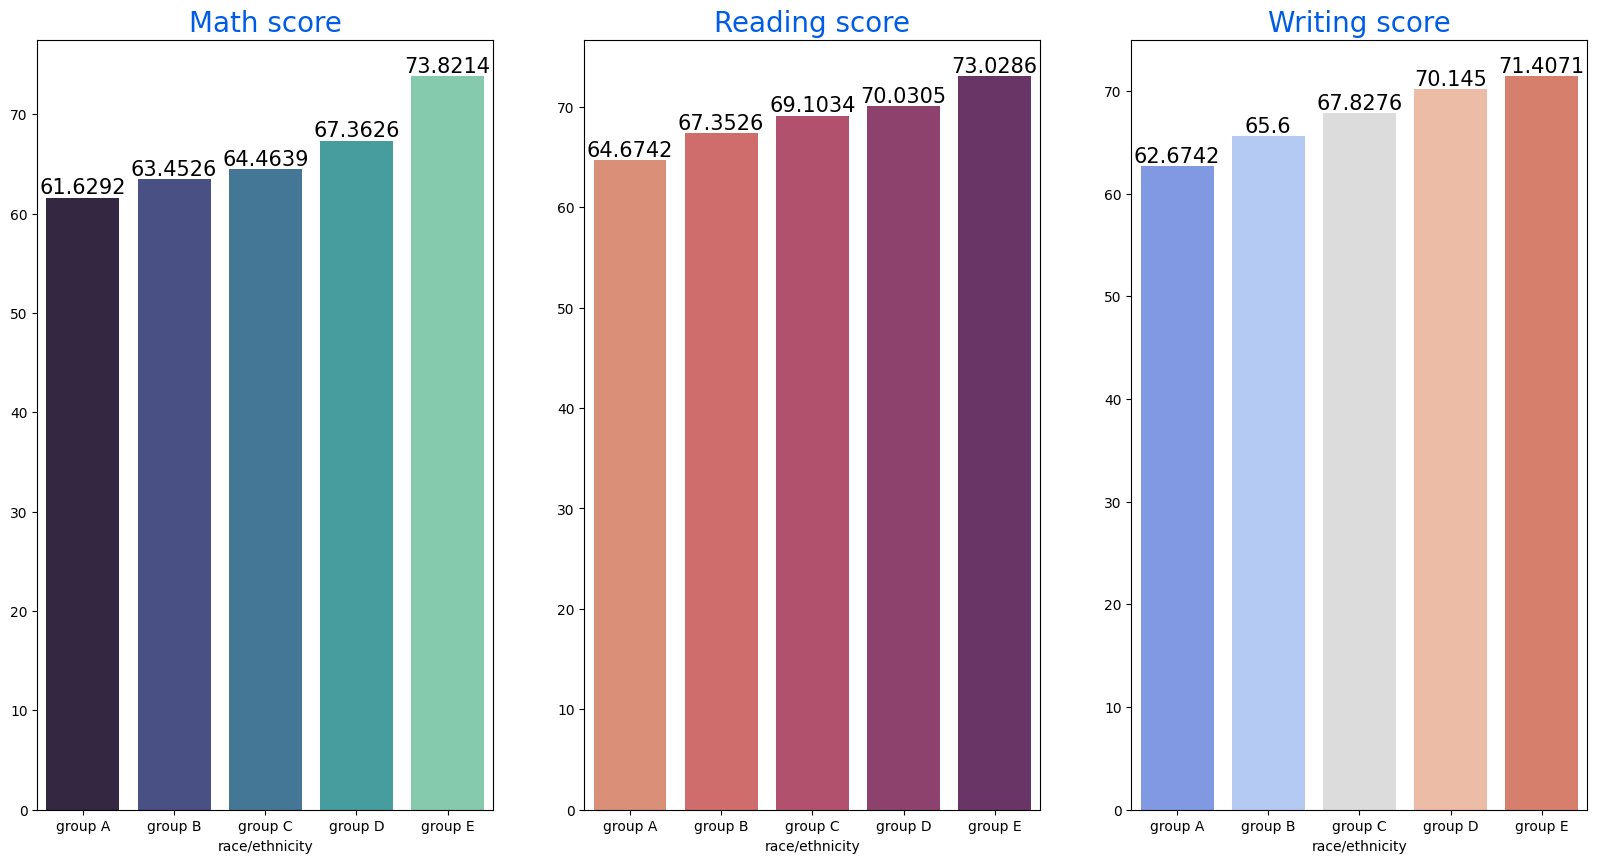

In [60]:
group_data = df.groupby('race/ethnicity')

f , ax = plt.subplots(1 , 3 , figsize = (20,10))
sns.barplot(x = group_data['math score'].mean().index,y = group_data['math score'].mean().values , 
            palette = 'mako',ax=ax[0])
ax[0].set_title('Math score', color = '#005ce6', size = 20)  

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['reading score'].mean().index,y=group_data['reading score'].mean().values,
            palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['writing score'].mean().index,y=group_data['writing score'].mean().values,
            palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)    

plt.show()            

Insights

* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

##### Parental Level of Education

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

Univariate Analysis ( What is educational background of student's parent ?)

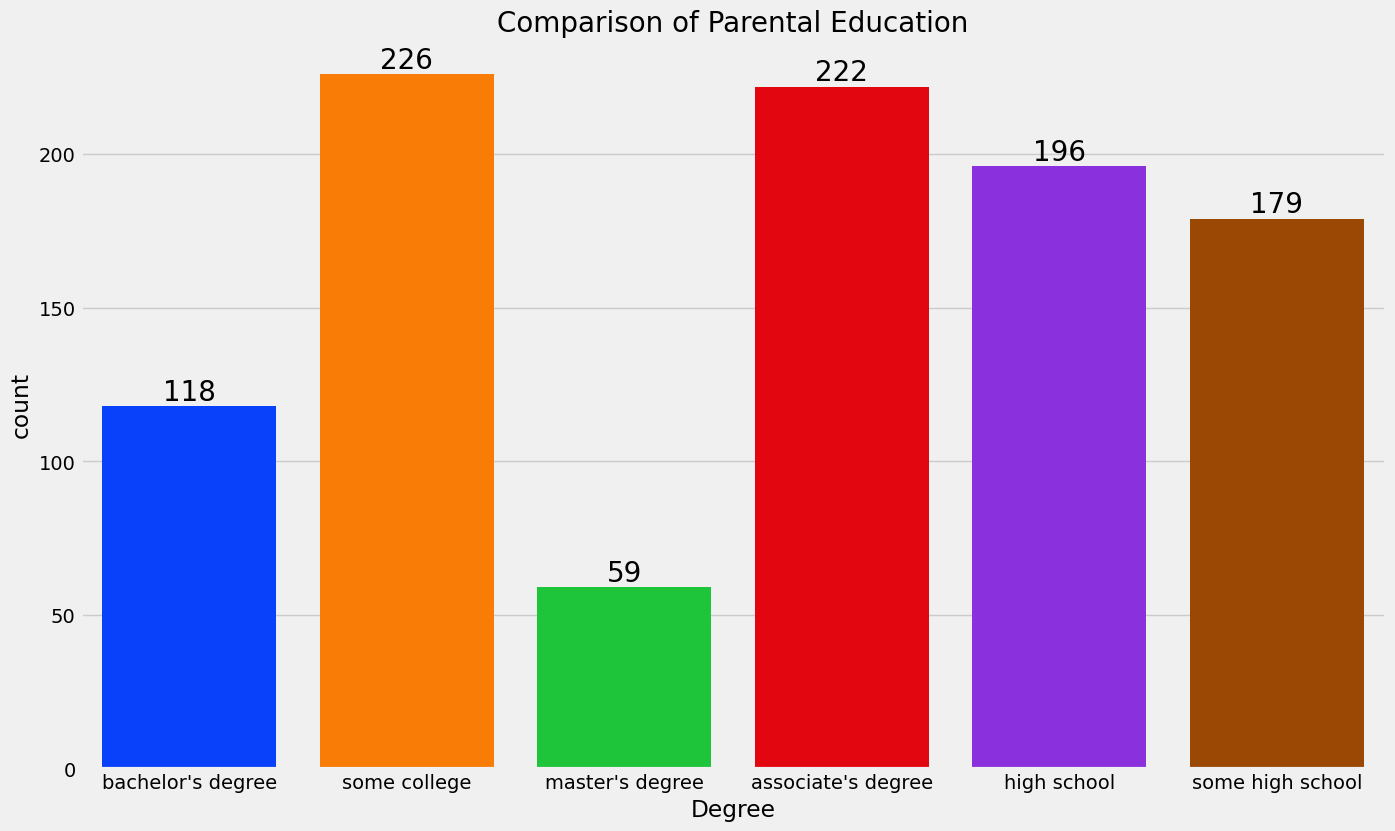

In [68]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x = df['parental level of education'] , data = df ,palette = 'bright' , saturation = 0.95)
for container in ax.containers:
    ax.bar_label(container , color = 'black' , size = 20) 
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')    
plt.show()

Insights
* Largest number of parents are from some colleges.

Bivariate Analysis (Impact of parental level of education on students performance)

In [70]:
parent_group = df.groupby('parental level of education')

In [80]:
parent_group['total score'].mean().values

array([208.70720721, 215.77118644, 189.29081633, 220.79661017,
       205.42920354, 195.32402235])

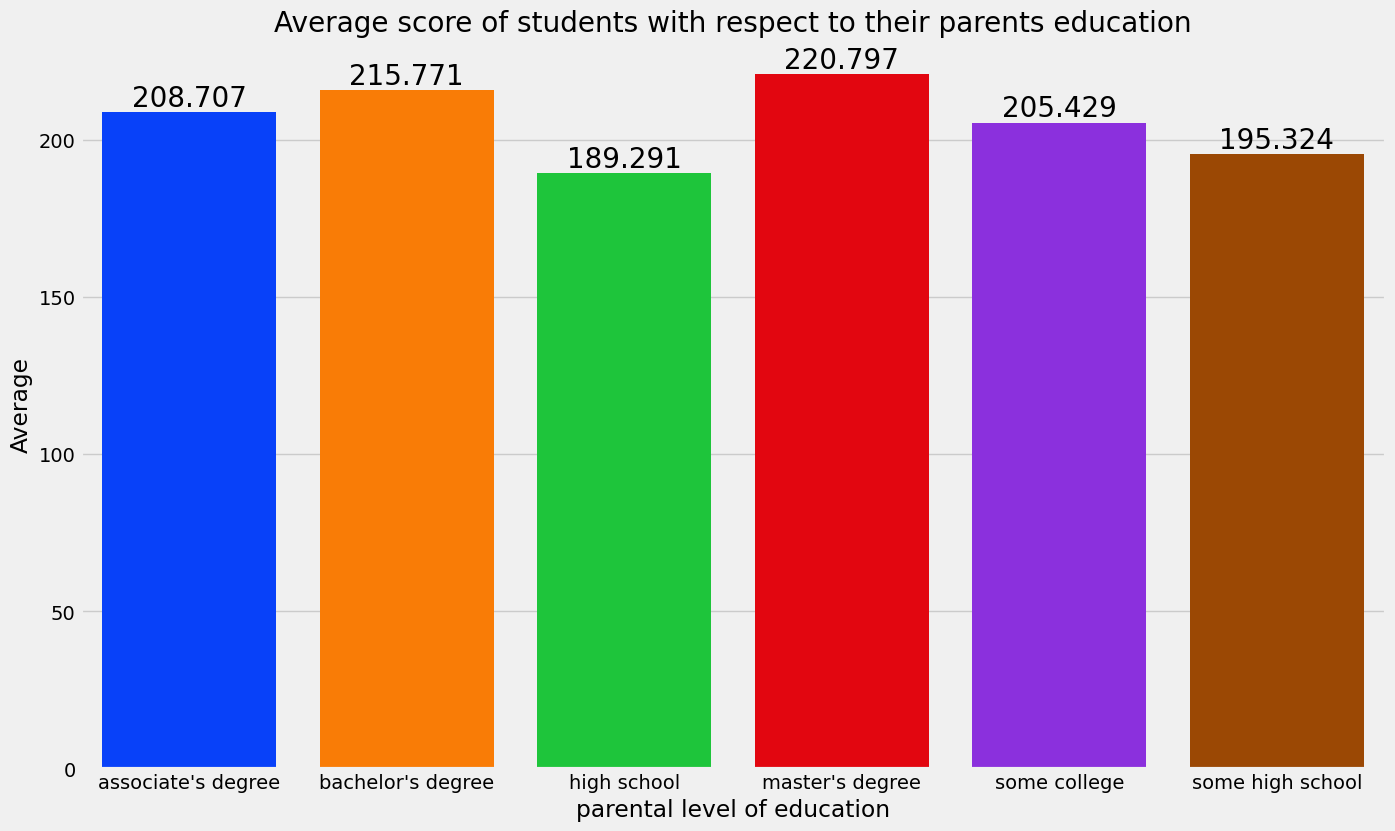

In [83]:
ax = sns.barplot(x = parent_group['total score'].mean().index , 
            y = parent_group['total score'].mean().values , palette = 'bright' , saturation = 0.95) 
for container in ax.containers:
    plt.bar_label(container , color = 'black' , size = 20)

plt.title('Average score of students with respect to their parents education')
plt.xlabel('parental level of education')
plt.ylabel('Average')
plt.show()     

Insights
* The score of students whose parents posess masters and bachelors degree are higher.

#### Lunch Column
* Which type of lunch is most common in students ?
* What is the effect of lunch type on test results ?

Univariate Analysis.

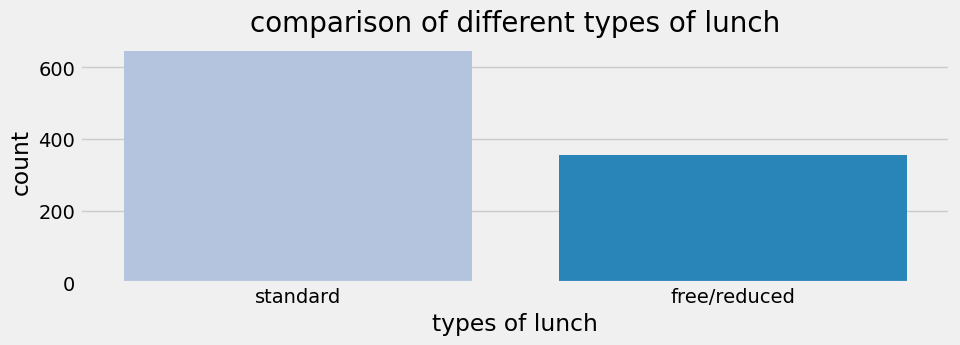

In [112]:
plt.rcParams['figure.figsize'] = (10, 3)
sns.countplot(x = df['lunch'] , data = df , palette = 'PuBu' , saturation = 0.95 )
plt.title('comparison of different types of lunch' , fontweight = 30 , fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show() 

Insights
* Students being served Standard lunch was more than free lunch.

In [90]:
lunch_group = df.groupby('lunch')
lunch_group['total score']

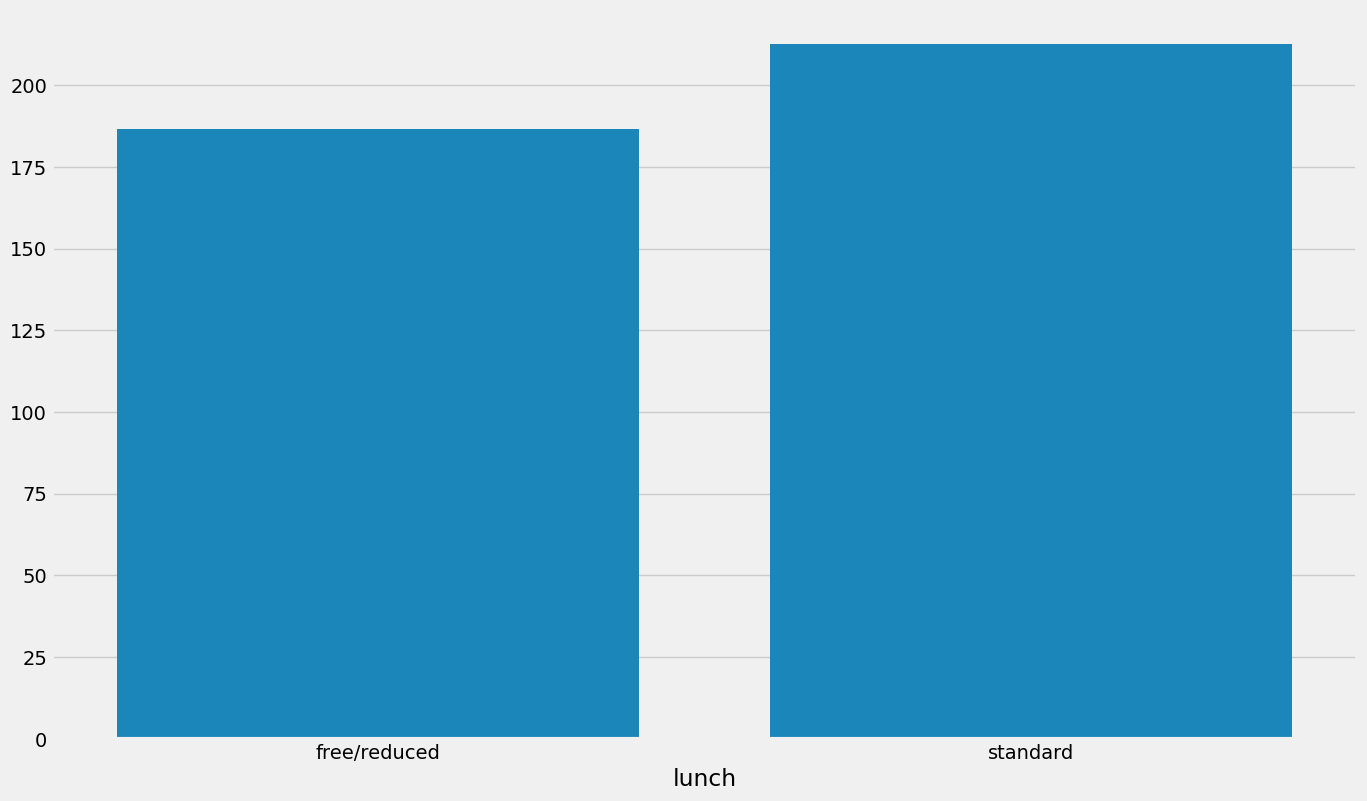

In [93]:
sns.barplot(x = lunch_group['total score'].mean().index , y = lunch_group['total score'].mean().values) 
plt.show()

Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

##### Test preparation course column


In [95]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

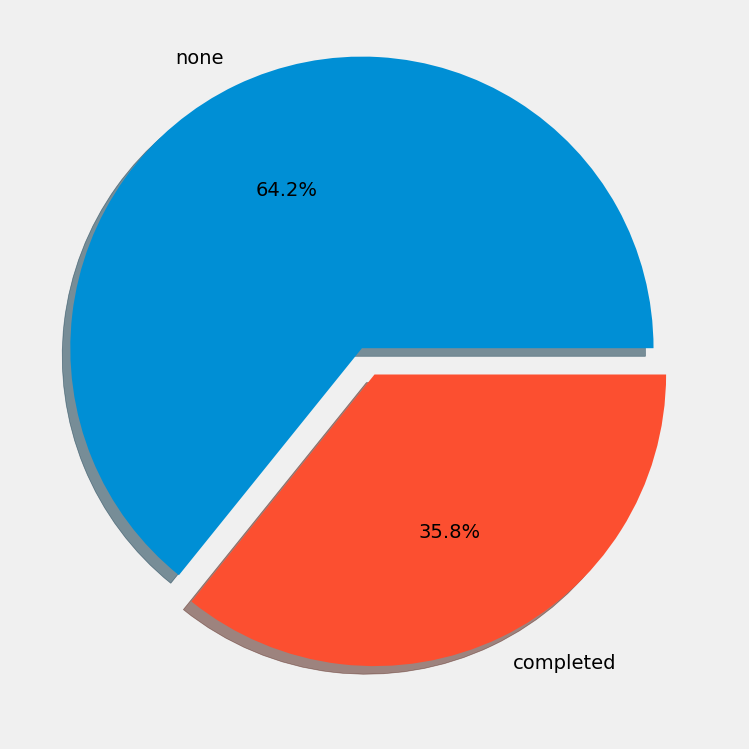

In [104]:
plt.pie(x = df['test preparation course'].value_counts(), labels =df['test preparation course'].value_counts().index,
        explode=[0.1,0],autopct='%1.1f%%',shadow=True ) 
plt.show()

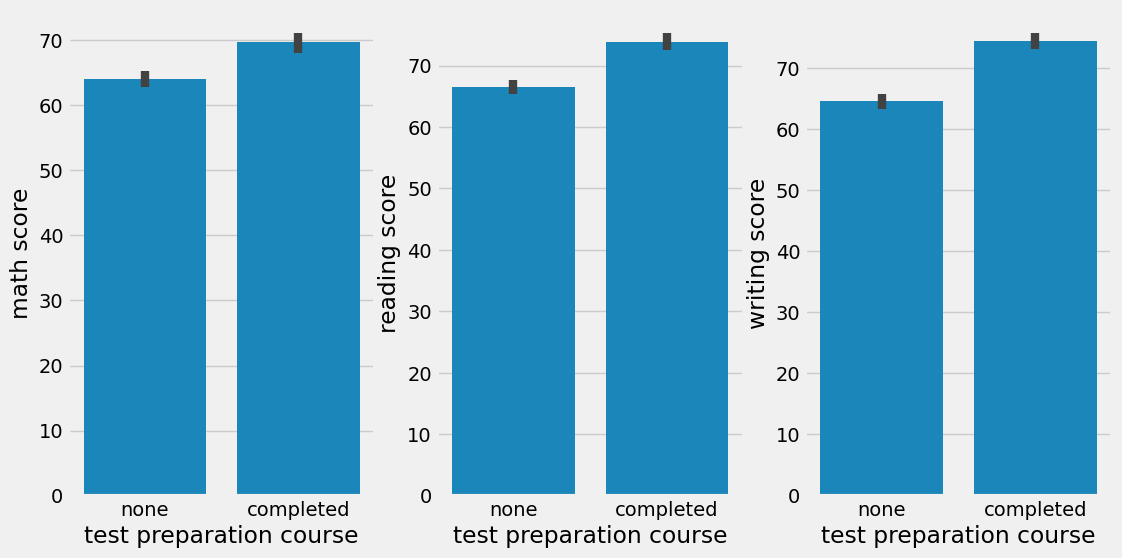

In [100]:
f , ax = plt.subplots(1,3,figsize = (12 , 6))
sns.barplot(x = df['test preparation course'] , y = df['math score'] , ax = ax[0])
sns.barplot(x = df['test preparation course'] , y = df['reading score'] , ax = ax[1])
sns.barplot(x = df['test preparation course'] , y = df['writing score'] , ax = ax[2]) 
plt.show()

Insights 
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

Outliers

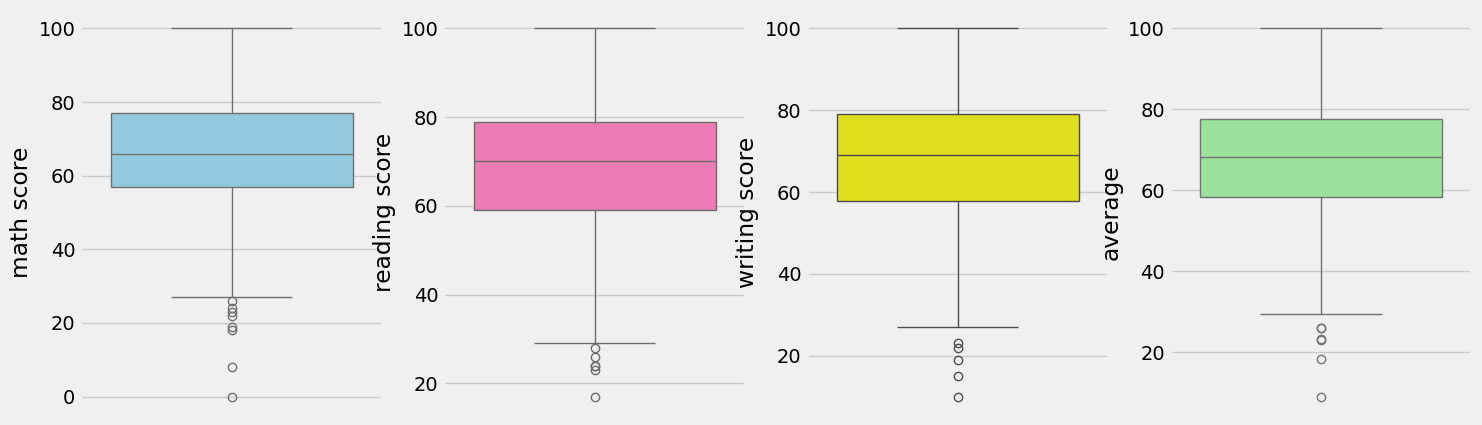

In [114]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

Multivariate Analysis using Pairplot

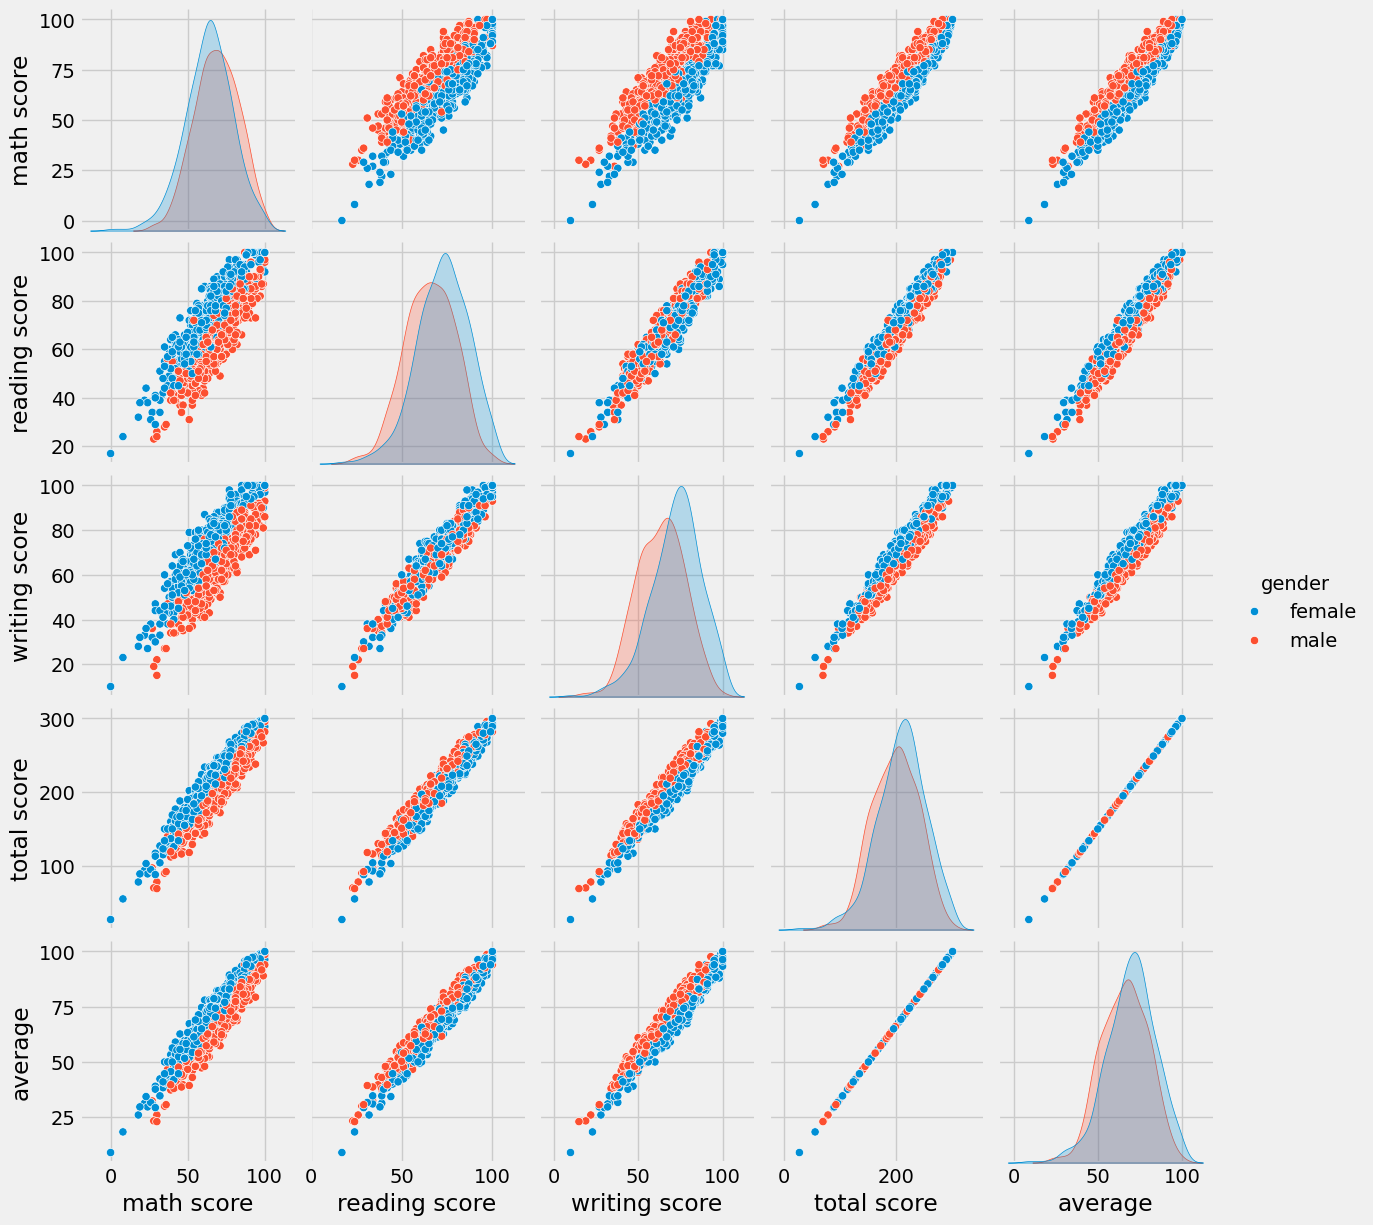

In [118]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights 
* From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.